## import 

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd


## Loading the dataset

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"
data_df = pd.read_csv(data_path, index_col = 0)


#print out the first 5 samples from the dataframe
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## plotting in the form of scatter plot

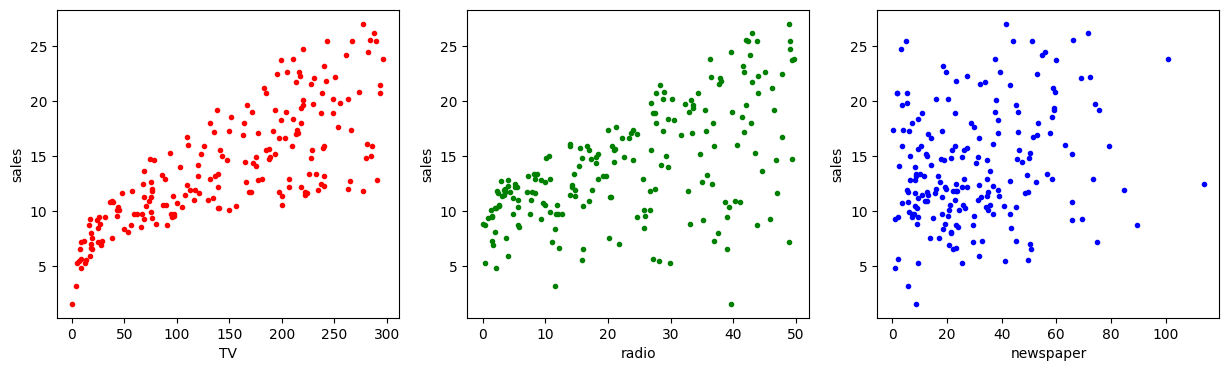

In [4]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df["TV"], data_df["sales"], color="red", marker=".")
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df["radio"], data_df["sales"], color="green", marker=".")
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"], data_df["sales"], color="blue", marker=".")
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()


## Simple Linear Regression with Ordinary least squares

/var/folders/k5/y70cdbnd4p52p6lw24_rbrl40000gn/T/ipykernel_41106/3969096133.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
/var/folders/k5/y70cdbnd4p52p6lw24_rbrl40000gn/T/ipykernel_41106/3969096133.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
/var/folders/k5/y70cdbnd4p52p6lw24_rbrl40000gn/T/ipykernel_41106/3969096133.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated Num

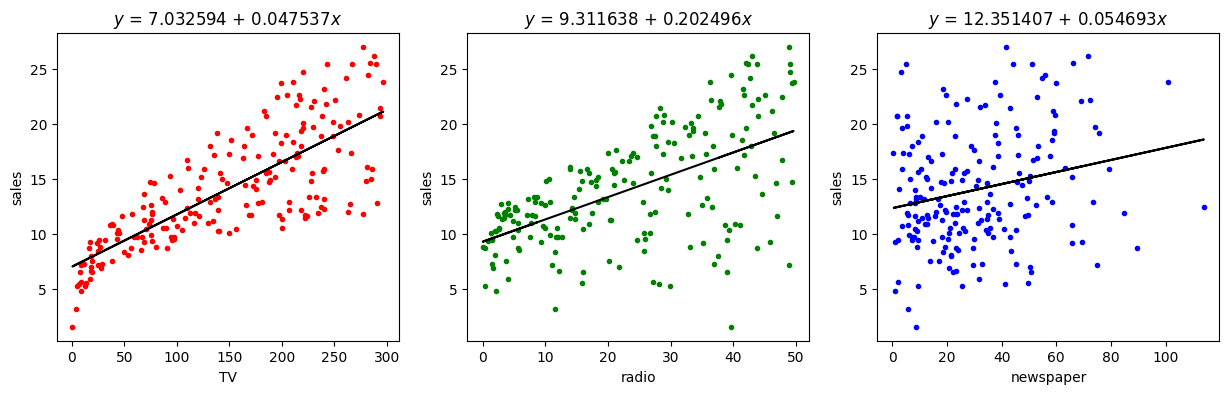

In [6]:
fig = plt.figure(figsize = (15,4))
gs = mpl.gridspec.GridSpec(1,3)

#function for training model and plotting

def train_plot(data_df, feature, ax, c):
    #initializing the input and outputs
    X = data_df[[feature]].values
    Y = data_df[["sales"]].values

    x_mean = np.mean(X)
    y_mean = np.mean(Y)

    n = len(X)

    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - x_mean)*(Y[i]- y_mean)
        denominator += (X[i] - x_mean)**2
    b1 = numerator / denominator
    b0 = y_mean - (b1 * x_mean)

    y_hat = b0 + np.dot(X,b1)

    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))


# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()

## Multiple Linear regression using Ordinary Least Squares 

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# Assume data_df is your DataFrame with columns: TV, radio, newspaper, sales

# ----------------------
# Model with TV and Radio
# ----------------------
X = data_df[["TV", "radio"]]
y = data_df[["sales"]]

# Add intercept term
X = np.c_[np.ones((X.shape[0], 1)), X]  # Shape becomes (200, 3)
X_transpose = X.T

# Normal equation
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

# Flatten betas to a list
b = betas.flatten()

# Display the equation
message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(b[0], b[1], b[2])
display(HTML(message))

print()

# ----------------------
# Model with all features
# ----------------------
X = data_df[["TV", "radio", "newspaper"]]
y = data_df[["sales"]]

# Add intercept term
X = np.c_[np.ones((X.shape[0], 1)), X]  # Shape becomes (200, 4)
X_transpose = X.T

# Normal equation
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

# Flatten betas to a list
b = betas.flatten()

# Display the equation
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(b[0], b[1], b[2], b[3])
display(HTML(message))


NameError: name 'HTML' is not defined